# Project : Social Network Analysis

In this project, we will explore the functionality of GraphX by analyzing social networks. In these networks, users are represented as vertices (nodes), and the relationships between users, such as friendships, are represented as edges. 

Through this exploration, we aim to better understand how GraphX operates and how it can be used to process and analyze large-scale graph data efficiently. By leveraging GraphX's powerful graph processing capabilities, we will gain insights into its ability to handle graph structures at scale and perform operations like traversal, aggregation, and applying graph algorithms.

In [ ]:
import findspark
findspark.init()
import pyspark
import os

In [4]:
conf = pyspark.SparkConf()
sc = pyspark.SparkContext(conf=conf)
print(sc._conf.getAll())

[('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'), ('spark.app.id', 'local-1739362073260'), ('spark.app.submitTime', '1739362071219'), ('spark.jars', 'file:

In [5]:
from pyspark.sql import *

Create graph

In [6]:
from graphframes import *

In [7]:
spark = SparkSession(sc)

In [8]:
vertices = spark.createDataFrame([('1', 'Carter', 50),
                                  ('2', 'May', 26),
                                 ('3', 'Mills', 80),
                                  ('4', 'Hood', 65),
                                  ('5', 'Banks', 93),
                                 ('98', 'Berg', 28),
                                 ('99', 'Page', 16)],
                                 ['id', 'name', 'age'])
edges = spark.createDataFrame([('1', '2', 'friend'),
                               ('1', '98', 'friend'),
                               ('2', '1', 'friend'),
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('2', '3', 'follows'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                              ('98', '99', 'friend'),
                              ('99', '98', 'friend')],
                              ['src', 'dst', 'type'])

In [9]:
g = GraphFrame(vertices, edges)

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [10]:
## Take a look at the DataFrames
g.vertices.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  2|   May| 26|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
| 98|  Berg| 28|
| 99|  Page| 16|
+---+------+---+



In [11]:
g.edges.show()

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  1| 98| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+



In [ ]:
degrees=g.degrees
degrees.show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+------+
| id|degree|
+---+------+
|  1|     5|
|  2|     3|
| 98|     3|
|  3|     7|
|  4|     3|
|  5|     3|
| 99|     2|
+---+------+



In [ ]:
in_degrees=g.inDegrees
in_degrees.show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+--------+
| id|inDegree|
+---+--------+
|  2|       1|
| 98|       2|
|  1|       2|
|  3|       4|
|  4|       1|
|  5|       2|
| 99|       1|
+---+--------+



In [ ]:
out_degrees=g.outDegrees
out_degrees.show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+---------+
| id|outDegree|
+---+---------+
|  1|        3|
|  2|        2|
|  3|        3|
|  4|        2|
|  5|        1|
| 98|        1|
| 99|        1|
+---+---------+



In [15]:
triplets=g.triplets
triplets.show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---------------+----------------+---------------+
|            src|            edge|            dst|
+---------------+----------------+---------------+
| {3, Mills, 80}|  {3, 1, friend}|{1, Carter, 50}|
|   {2, May, 26}|  {2, 1, friend}|{1, Carter, 50}|
|{1, Carter, 50}|  {1, 2, friend}|   {2, May, 26}|
| {5, Banks, 93}|  {5, 3, friend}| {3, Mills, 80}|
|  {4, Hood, 65}|  {4, 3, friend}| {3, Mills, 80}|
|   {2, May, 26}| {2, 3, follows}| {3, Mills, 80}|
|{1, Carter, 50}|  {1, 3, friend}| {3, Mills, 80}|
| {3, Mills, 80}|  {3, 4, friend}|  {4, Hood, 65}|
|  {4, Hood, 65}| {4, 5, follows}| {5, Banks, 93}|
| {3, Mills, 80}|  {3, 5, friend}| {5, Banks, 93}|
| {99, Page, 16}|{99, 98, friend}| {98, Berg, 28}|
|{1, Carter, 50}| {1, 98, friend}| {98, Berg, 28}|
| {98, Berg, 28}|{98, 99, friend}| {99, Page, 16}|
+---------------+----------------+---------------+



Visualize graph

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'], row['dst'])
    nx.draw(Gplot, with_labels=True, font_weight='bold')

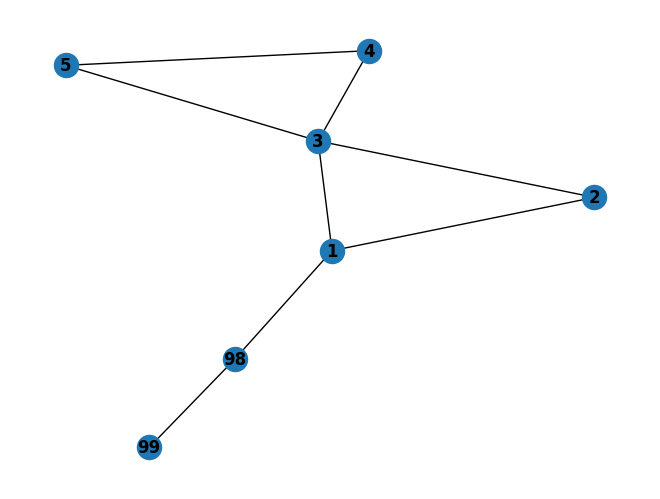

In [18]:
PlotGraph(g.edges)

In [19]:
# Add new vertices and edges
new_vertices = spark.createDataFrame([('6', 'Thomas', 30),
                                 ('7', 'Matthew', 25)],
                                 ['id', 'name', 'age'])
new_edges = spark.createDataFrame([('6', '7', 'friend')],
                              ['src', 'dst', 'type'])

In [20]:
combined_vertices = g.vertices.union(new_vertices).distinct()
combined_edges = g.edges.union(new_edges)

In [22]:
g = GraphFrame(combined_vertices, combined_edges)

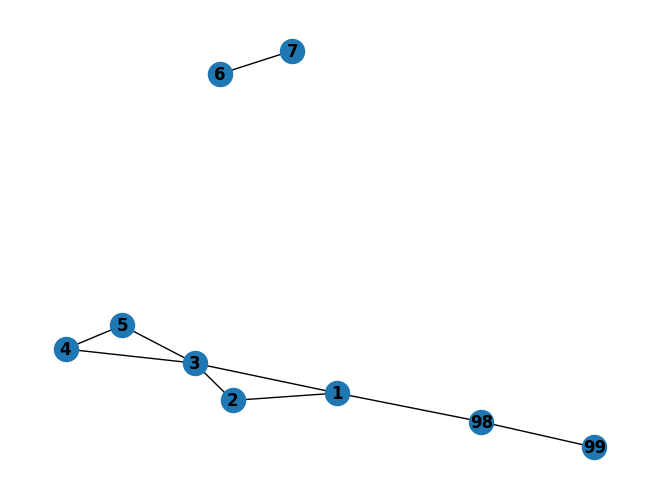

In [23]:
PlotGraph(g.edges)

Filtering

In [24]:
g.vertices.filter('age>30').show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
+---+------+---+



In [25]:
g.inDegrees.filter('inDegree >= 2').sort('inDegree', ascending=False).show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+--------+
| id|inDegree|
+---+--------+
|  3|       4|
| 98|       2|
|  1|       2|
|  5|       2|
+---+--------+



Subgraph

In [31]:
condition = "type='follows'"
subgraph=g.filterEdges(condition)
subgraph.edges.show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  2|  3|follows|
|  4|  5|follows|
+---+---+-------+



Motif finding

In [32]:
mutualFriends = g.find("(a)-[]->(b); (b)-[]->(c); (c)-[]->(b); (b)-[]->(a)")\
                                                                .dropDuplicates()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [33]:
mutualFriends.filter('a.id==3').show()

+--------------+---------------+--------------+
|             a|              b|             c|
+--------------+---------------+--------------+
|{3, Mills, 80}|  {4, Hood, 65}|{3, Mills, 80}|
|{3, Mills, 80}| {5, Banks, 93}|{3, Mills, 80}|
|{3, Mills, 80}|{1, Carter, 50}|{3, Mills, 80}|
|{3, Mills, 80}|{1, Carter, 50}|  {2, May, 26}|
+--------------+---------------+--------------+



In [34]:
mutualFriends.filter('a.id==2 and c.id==3').show()

+------------+---------------+--------------+
|           a|              b|             c|
+------------+---------------+--------------+
|{2, May, 26}|{1, Carter, 50}|{3, Mills, 80}|
+------------+---------------+--------------+



Triangle count

In [35]:
g.triangleCount().show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-----+---+-------+---+
|count| id|   name|age|
+-----+---+-------+---+
|    0|  7|Matthew| 25|
|    2|  3|  Mills| 80|
|    0| 98|   Berg| 28|
|    0| 99|   Page| 16|
|    1|  5|  Banks| 93|
|    0|  6| Thomas| 30|
|    1|  1| Carter| 50|
|    1|  4|   Hood| 65|
|    1|  2|    May| 26|
+-----+---+-------+---+



Graph Traversals

In [36]:
bfs_result = g.bfs('id=1', 'id=3', maxPathLength=2)
bfs_result.show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---------------+--------------+--------------+
|           from|            e0|            to|
+---------------+--------------+--------------+
|{1, Carter, 50}|{1, 3, friend}|{3, Mills, 80}|
+---------------+--------------+--------------+



Component

In [ ]:
sc.setCheckpointDir('Chap13/graphframes_cps')

In [38]:
g.connectedComponents().show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+-------+---+------------+
| id|   name|age|   component|
+---+-------+---+------------+
|  1| Carter| 50|154618822656|
|  2|    May| 26|154618822656|
|  3|  Mills| 80|154618822656|
|  4|   Hood| 65|154618822656|
|  5|  Banks| 93|154618822656|
| 98|   Berg| 28|154618822656|
| 99|   Page| 16|154618822656|
|  6| Thomas| 30| 25769803776|
|  7|Matthew| 25| 25769803776|
+---+-------+---+------------+



In [39]:
g.connectedComponents()[['component']].distinct().show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+------------+
|   component|
+------------+
|154618822656|
| 25769803776|
+------------+



Page Rank

In [40]:
pr = g.pageRank(resetProbability=0.15, tol=0.01)
pr.vertices.show()

C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
C:\Spark\spark-3.5.1-bin-hadoop3\python\pyspark\sql\dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+---+-------+---+-------------------+
| id|   name|age|           pagerank|
+---+-------+---+-------------------+
|  7|Matthew| 25| 0.3613292126295438|
|  3|  Mills| 80|  1.640748392771466|
| 98|   Berg| 28|  2.043046479731969|
| 99|   Page| 16|  1.931902595680035|
|  5|  Banks| 93| 0.9281925491203596|
|  6| Thomas| 30|0.19531308790786153|
|  1| Carter| 50| 0.8201566044944687|
|  4|   Hood| 65| 0.6565050480552301|
|  2|    May| 26|0.42280602960906566|
+---+-------+---+-------------------+



In [41]:
pr.edges.show()

+---+---+-------+------------------+
|src|dst|   type|            weight|
+---+---+-------+------------------+
|  3|  5| friend|0.3333333333333333|
|  3|  1| friend|0.3333333333333333|
|  3|  4| friend|0.3333333333333333|
| 98| 99| friend|               1.0|
| 99| 98| friend|               1.0|
|  5|  3| friend|               1.0|
|  6|  7| friend|               1.0|
|  1|  3| friend|0.3333333333333333|
|  1| 98| friend|0.3333333333333333|
|  1|  2| friend|0.3333333333333333|
|  4|  3| friend|               0.5|
|  4|  5|follows|               0.5|
|  2|  3|follows|               0.5|
|  2|  1| friend|               0.5|
+---+---+-------+------------------+

